# Principal Component Analysis

$max \    Var(X_{project}) = \frac{1}{m} \sum (X_{project} - \bar X)^2 = \frac{1}{m}\sum(X_i·w)^2$

<font size=4>$w$ is the unit transition matrix of the axis  of PCA </font>

$f(w) = \frac{1}{m} \sum(X_i·w)^2 = \frac{1}{m} (Xw)'Xw$

$\nabla f(w) =\frac{2}{m} \begin{bmatrix} \partial f/ \partial w_1 \\ \partial f/ \partial w_2\\ ····· \\ \partial f/ \partial w_n  \end{bmatrix} = \frac{2}{m} \begin{bmatrix} \sum_{i = 1}^m (X_i·w)(X_{i1}) \\ \sum_{i = 1}^m (X_i·w)(X_{i2}) \\ ····· \\ \sum_{i = 1}^n (X_i·w)(X_{in})  \end{bmatrix} = 
\frac{2}{m}X^TXw $



## PCA by Gradient Ascend

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty(( 100, 2))
X[:, 0] = np.random.uniform(0., 100., size = 100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10, size = 100)

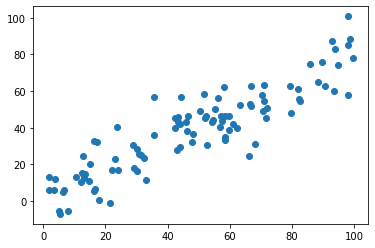

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

### demean

In [4]:
def demean(X):
    return X - np.mean(X, axis = 0)

In [5]:
X_demean = demean(X)

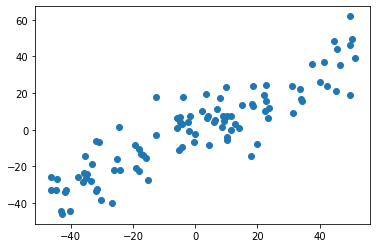

In [6]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.show()

### Gradient Ascent

In [7]:
def f(w, X):
    return np.sum((X.dot(w) ** 2)) / len(X)

In [8]:
def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

In [9]:
def df_debug(w, X, epsilon = 0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X))/(2 * epsilon)
    return res

In [10]:
def direction(w):
    return w / np.linalg.norm(w)

def first_component(df, X, initial_w, eta, n_iters = 1e4, epsilon = 1e-8):
    
    w = direction(initial_w)
    i_iter = 0

    while i_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) # Normalizition the w

        if (abs(f(w, X) - f(last_w, X)) < epsilon):
            break

        i_iter += 1

    return w

In [11]:
initial_w = np.random.random(X.shape[1]) 
# The W can't be zero vector

In [12]:
eta = 0.001 # No need to standardlize X

In [13]:
w = first_component(df_debug, X_demean, initial_w, eta)

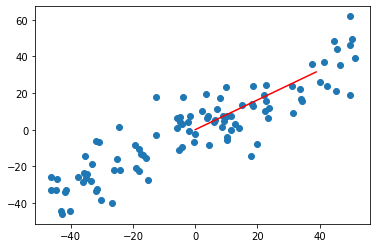

In [14]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot([0, w[0] * 50], [0, w[1] * 50], color = 'red')
plt.show()

In [15]:
X2 = np.empty(( 100, 2))
X2[:, 0] = np.random.uniform(0., 100., size = 100)
X2[:, 1] = 0.75 * X2[:, 0] + 3.

In [16]:
X2_demean = demean(X2)

In [17]:
w2 = first_component(df, X2_demean, initial_w, eta)

In [18]:
w2

array([0.80000029, 0.59999961])

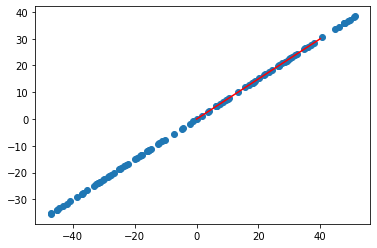

In [19]:
plt.scatter(X2_demean[:, 0], X2_demean[:, 1])
plt.plot([0, w2[0] * 50], [0, w2[1] * 50], color = 'red')
plt.show()

## The n-ed Principal Component

In [20]:
def direction(w):
    return w / np.linalg.norm(w)

def first_component(X, initial_w, eta, n_iters = 1e4, epsilon = 1e-8):
    
    w = direction(initial_w)
    i_iter = 0

    while i_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) # Normalizition the w

        if (abs(f(w, X) - f(last_w, X)) < epsilon):
            break

        i_iter += 1

    return w

In [21]:
X_2 = X - X.dot(w).reshape(-1, 1) * w

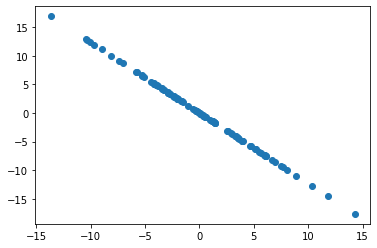

In [22]:
plt.scatter(X_2[:, 0], X_2[:, 1])
plt.show()

In [23]:
w_2 = first_component(X_2, initial_w, eta)
w_2

array([ 0.62957679, -0.77693826])

In [24]:
w.dot(w_2)

2.2897815246669673e-05

In [25]:
def first_n_component(n, X, eta = 0.01, n_iters = 1e4, spsilon = 1e-8):
    
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1]) 
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
    
    return res

In [26]:
first_n_component(2, X)

[array([0.77695202, 0.62955981]), array([ 0.62956416, -0.7769485 ])]